#TREINAMENTO E TESTE

A base de dados é muito grande para ser carregada no Github e Colab, optei por subir no Drive e carregar as imagens de lá. Segue o link abaixo:

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

#BIBLIOTECAS, MONTAGEM DO GOOGLE DRIVE E DEFINIÇÃO DOS DIRETÓRIOS

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/REDES NEURAIS/chest_xray'

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

print("Treino:", os.listdir(train_dir))
print("Validação:", os.listdir(val_dir))
print("Teste:", os.listdir(test_dir))

Mounted at /content/drive
Treino: ['NORMAL', 'PNEUMONIA']
Validação: ['NORMAL', 'PNEUMONIA']
Teste: ['PNEUMONIA', 'NORMAL']


# PRÉ-PROCESSAMENTO DOS DADOS

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# DEFINIÇÃO DO MODELO

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# TREINAMENTO DO MODELO

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1016s 6s/step - accuracy: 0.7538 - loss: 0.5650 - val_accuracy: 0.8125 - val_loss: 0.7361
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.8571 - loss: 0.3104 - val_accuracy: 0.9375 - val_loss: 0.4324
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.8958 - loss: 0.2535 - val_accuracy: 0.7500 - val_loss: 0.6501
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9004 - loss: 0.2525 - val_accuracy: 0.9375 - val_loss: 0.4085
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9116 - loss: 0.2315 - val_accuracy: 0.7500 - val_loss: 0.8473
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9163 - loss: 0.2200 - val_accuracy: 0.8750 - val_loss: 0.4345
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9160 - loss: 0.2174 - val_accuracy: 0.9375 - val_loss: 0.2737
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9309 - loss: 0.1888 - val_acc

# AVALIAÇÃO GRÁFICA

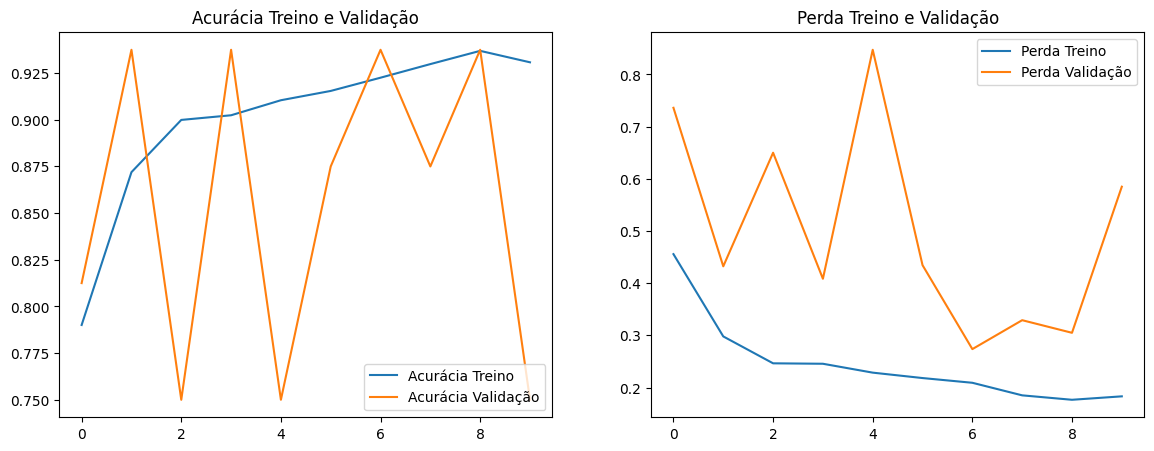

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia Treino')
plt.plot(epochs_range, val_acc, label='Acurácia Validação')
plt.legend(loc='lower right')
plt.title('Acurácia Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda Treino')
plt.plot(epochs_range, val_loss, label='Perda Validação')
plt.legend(loc='upper right')
plt.title('Perda Treino e Validação')

plt.show()

# AVALIAÇÃO NO TESTE

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Acurácia no conjunto de teste: {test_acc*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 359s 19s/step - accuracy: 0.6149 - loss: 0.7674
Acurácia no conjunto de teste: 79.65%


# SALVAR MODELO TREINADO

In [ ]:
model.save('/content/drive/MyDrive/REDES NEURAIS/modelo_pneumonia.h5')

#VALIDAÇÃO

# MONTAR O DRIVE E BUSCAR O MODELO JÁ TREINADO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

modelo_path = '/content/drive/MyDrive/REDES NEURAIS/modelo_pneumonia.h5'
model = load_model(modelo_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FAZER PREDIÇÃO E INTERPRETAR

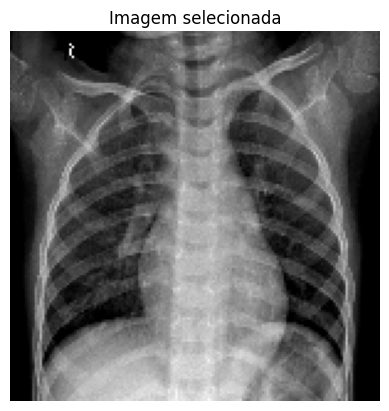

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
🟢 Resultado: NORMAL (probabilidade: 0.94)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/REDES NEURAIS/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'

img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)
plt.axis('off')
plt.title("Imagem selecionada")
plt.show()

# Fazer a previsão
pred = model.predict(img_array)[0][0]

# Interpretar
if pred >= 0.5:
    print(f"🔴 Resultado: PNEUMONIA (probabilidade: {pred:.2f})")
else:
    print(f"🟢 Resultado: NORMAL (probabilidade: {1 - pred:.2f})")
